### LOD=13

In [25]:
###############LOD=13####################
all_13=[]
LG1Ratio_13=[]
informative_13=[]
for i in range(1,2044):
    count=0
    with open("../soft/lepmap3/result13/split"+str(i)+".vcf.txt","r") as f:
        all_13.append(f.readlines()[1:])
        for j in range(len(all_13[i-1])):
            all_13[i-1][j]=int(all_13[i-1][j][0])
            if all_13[i-1][j]==1:
                count+=1
    informative_13.append(len(all_13[i-1]))
    if not len(all_13[i-1])==0:
        LG1Ratio_13.append(round(count/len(all_13[i-1]),3))

(0.0, 1100.0)

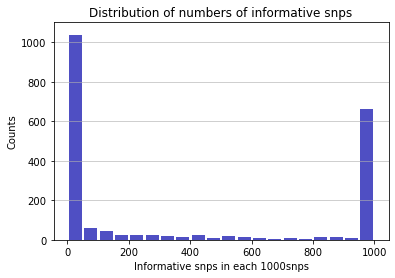

In [32]:
####总体情况
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=informative_13, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Informative snps in each 1000snps')
plt.ylabel('Counts')
plt.title("Distribution of numbers of informative snps")
#plt.text(100, 150050, r'max=741bp, 31444>100bp')
maxfreq = n.max()
# # 设置y轴的上限
plt.ylim(ymax=1100)
#fig=plt.gcf()
#fig.savefig('./666.jpg')

(0.0, 500.0)

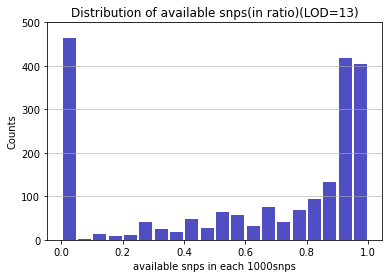

In [33]:
###LOD=13的重组率情况（画图）
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=LG1Ratio_13, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('available snps in each 1000snps')
plt.ylabel('Counts')
plt.title("Distribution of available snps(in ratio)(LOD=13)")
#plt.text(100, 150050, r'max=741bp, 31444>100bp')
maxfreq = n.max()
# # 设置y轴的上限
plt.ylim(ymax=500)
#fig=plt.gcf()
#fig.savefig('./666.jpg')

### Soft Masking

In [36]:
labellist=[]
finallabel_13=[]
for i in range(len(LG1Ratio_13)):
    labellist.append([])
    if not LG1Ratio_13[i]>0.85:
        for j in range(len(all_13[i])):
            labellist[i].append(99)
    else:
        for j in range(len(all_13[i])):
            if all_13[i][j]==1:
                labellist[i].append(0)
            else:
                labellist[i].append(1)
for i in range(len(labellist)):
    for j in range(len(labellist[i])):
        finallabel_13.append(labellist[i][j])

In [41]:
### 软删除后的统计
left=0
del1=0
del2=0
for i in finallabel_13:
    if i==0:
        left+=1
    elif i==1:  ##内部删
        del1+=1
    else:     ##整块删
        del2+=1
print(left,del1,del2,left/len(finallabel_13))

633961 43235 114061 0.8012074458740965


### LOD=12

(0.0, 800.0)

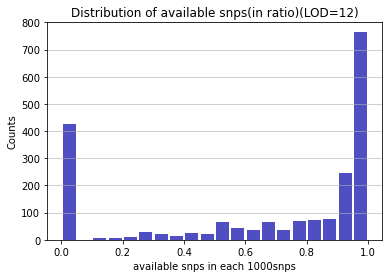

In [18]:
#########LOD=12##############
all_12=[]
LG1Ratio_12=[]
informative_12=[]
for i in range(1,2044):
    count=0
    with open("../soft/lepmap3/dataCall12/split"+str(i)+".vcf.txt","r") as f:
        all_12.append(f.readlines()[1:])
        for j in range(len(all_12[i-1])):
            all_12[i-1][j]=int(all_12[i-1][j][0])
            if all_12[i-1][j]==1:
                count+=1
    informative_12.append(len(all_12[i-1]))
    if not len(all_12[i-1])==0:
        LG1Ratio_12.append(round(count/len(all_12[i-1]),3))

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=LG1Ratio_12, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('available snps in each 1000snps')
plt.ylabel('Counts')
plt.title("Distribution of available snps(in ratio)(LOD=12)")
#plt.text(100, 150050, r'max=741bp, 31444>100bp')
maxfreq = n.max()
# # 设置y轴的上限
plt.ylim(ymax=800)
#fig=plt.gcf()
#fig.savefig('./666.jpg')

### LOD=14

(0.0, 600.0)

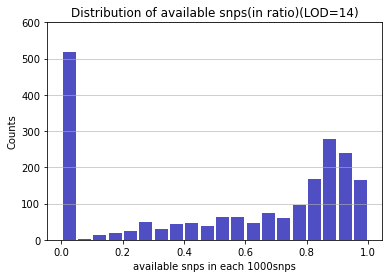

In [13]:
#########LOD=14##############
all_14=[]
LG1Ratio_14=[]
informative_14=[]
for i in range(1,2044):
    count=0
    with open("../soft/lepmap3/dataCall14/split"+str(i)+".vcf.txt","r") as f:
        all_14.append(f.readlines()[1:])
        for j in range(len(all_14[i-1])):
            all_14[i-1][j]=int(all_14[i-1][j][0])
            if all_14[i-1][j]==1:
                count+=1
    informative_14.append(len(all_14[i-1]))
    if not len(all_14[i-1])==0:
        LG1Ratio_14.append(round(count/len(all_14[i-1]),3))

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=LG1Ratio_14, bins=20, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('available snps in each 1000snps')
plt.ylabel('Counts')
plt.title("Distribution of available snps(in ratio)(LOD=14)")
#plt.text(100, 150050, r'max=741bp, 31444>100bp')
maxfreq = n.max()
# # 设置y轴的上限
plt.ylim(ymax=600)
#fig=plt.gcf()
#fig.savefig('./666.jpg')

### 选LOD值

In [42]:
count=0
for i in range(len(LG1Ratio_14)):
    if LG1Ratio_14[i]>=0.85:
        count+=1
print(count/len(LG1Ratio_14))

0.33644400785854617


|        | >80%线 | >85%线 |
| :----: | :----: | :----: |
| LOD=12 | 56.9%  | 53.5%  |
| LOD=13 | 51.4%  | 46.9%  |
| LOD=14 | 41.8%  | 33.6%  |

*表格内百分比为将要保留的整段1000snp占所有的1000snp的比例